# Introduction

The United States' health care system has always been problematics for citizens that can not afford health insurance. This issue has been increasing compared to other First World Countries as the U.S. does not provide a law that provide health services for everybody. For this project, I am going to compare the average prices of health charges and use linear regression and Random Forest to predict the prices.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Obtaining Data 

The data that was obtained was from data.gov, a public dataset provided by the United States Government. 

- Columns:
1. DRG Definition: Code and description identifying the DRG. DRGs are a classification system that groups similar clinical conditions (diagnoses) and the procedures furnished by the hospital during the stay.
2. Provide ID: Provider Identifier billing for inpatient hospital services.
3. Provider Name: Name of the provider.
4. Provider Street Address: Street address in which the provider is physically located.
5. Provider City: City in which the provider is physically located.
6. Provider State: State in which the provider is physically located.
7. Provider Zip Code: Zip code in which the provider is physically located.
8. Hospital Referral Region Description: HRR in which the provider is physically located.
9. Total Discharges: The number of discharges billed by the provider for inpatient hospital services.
10. Average Covered Charges: The provider's average charge for services covered by Medicare for all discharges in the DRG. These will vary from hospital to hospital because of differences in hospital charge structures.
11. Average Total Payments: The average of Medicare payments to the provider for the DRG including the DRG amount, teaching,  disproportionate share, capital, and outlier payments for all cases. Also included are co-payment and deductible amounts that the patient is responsible for
12. Average Medicare Payments: 


In [85]:
payment = pd.read_csv('Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv')

In [86]:
payment.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


# Check For Missing Values

In [87]:
payment.info()
payment.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                          163065 non-null object
Provider Id                             163065 non-null int64
Provider Name                           163065 non-null object
Provider Street Address                 163065 non-null object
Provider City                           163065 non-null object
Provider State                          163065 non-null object
Provider Zip Code                       163065 non-null int64
Hospital Referral Region Description    163065 non-null object
 Total Discharges                       163065 non-null int64
 Average Covered Charges                163065 non-null float64
 Average Total Payments                 163065 non-null float64
Average Medicare Payments               163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ MB


DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64

Since there are no missing values, lets look at the ranges of each value and determine if there are any outliers

In [88]:
payment.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.954224,9707.473804,8494.490964
std,151563.671767,27854.323080,51.104042,35065.365931,7664.642598,7309.467261
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.900000
25%,110092.000000,27261.000000,17.000000,15947.160000,5234.500000,4192.350000
50%,250007.000000,44309.000000,27.000000,25245.820000,7214.100000,6158.460000
75%,380075.000000,72901.000000,49.000000,43232.590000,11286.400000,10056.880000
max,670077.000000,99835.000000,3383.000000,929118.900000,156158.180000,154620.810000


By looking at the max, min, and mean values from Average Covered Charges, Average Total Payments, Average Medicare Payments, and Total Discharges, there seems to be outliers. I am going to do some data visualization to approach a solution.  

# Data Visualization

In [89]:
payment.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

Text(0.5, 1.0, 'Average Total Payment Distribution Plot')

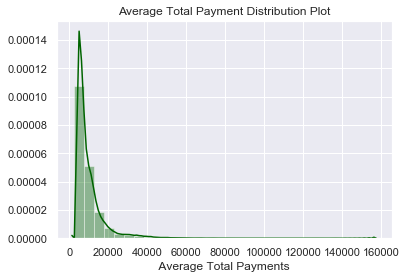

In [120]:
sns.distplot(payment[' Average Total Payments '], bins =30, color = 'darkgreen' )
plt.title('Average Total Payment Distribution Plot')

Text(0.5, 1.0, 'Average Covered Charges Distribution Plot')

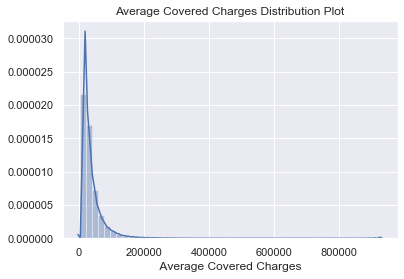

In [91]:
sns.distplot(payment[' Average Covered Charges '])
plt.title('Average Covered Charges Distribution Plot')

Text(0.5, 1.0, 'Average Medicare Payments Distribution Plot')

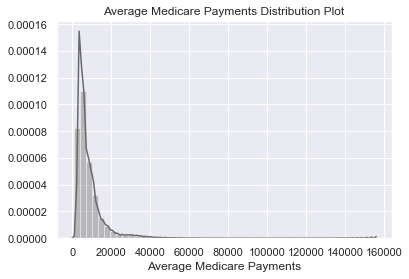

In [122]:
sns.distplot(payment['Average Medicare Payments'],color = 'dimgray')
plt.title('Average Medicare Payments Distribution Plot')

Text(0.5, 1.0, 'Total Dischages ')

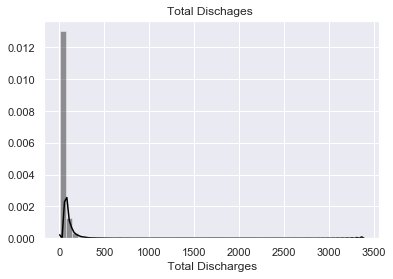

In [93]:
sns.distplot(payment[' Total Discharges '], color = 'black')
plt.title('Total Dischages ')

By looking at the distribution plots, I noticed a big outlier. 

# Data Cleaning

By comparing the graphs, it looks like there is a outlier in our data. However, I do not want to remove any data because these data can be accurate. In order to tackle this, I am going to use log transformation.

In [94]:
log_payment = np.log(payment[' Average Total Payments '])

In [95]:
payment['log_payment'] = log_payment

In [96]:
payment.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,log_payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,8.661681
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,8.663468
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,8.600606
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,8.597401
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,8.640884


Now that I will regraph it and compare it to see if it improves

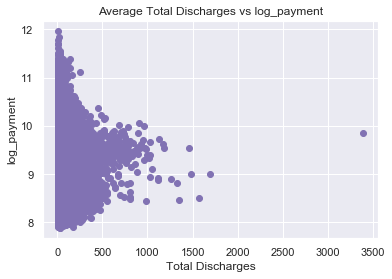

In [107]:
plt.scatter(' Total Discharges ','log_payment',data= payment, color='m')
plt.xlabel('Total Discharges')
plt.ylabel('log_payment')
plt.title('Average Total Discharges vs log_payment')
plt.show()

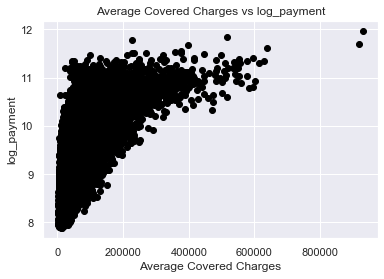

In [103]:
plt.scatter(' Average Covered Charges ','log_payment',data = payment,color='black')
plt.xlabel('Average Covered Charges')
plt.ylabel('log_payment')
plt.title('Average Covered Charges vs log_payment')
plt.show()

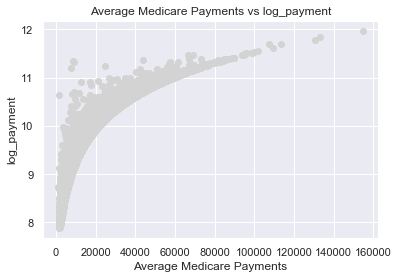

In [115]:
plt.scatter('Average Medicare Payments','log_payment',data = payment, color = 'lightgray')
plt.xlabel('Average Medicare Payments')
plt.ylabel('log_payment')
plt.title('Average Medicare Payments vs log_payment')
plt.show()

Text(0.5, 1.0, 'Log Payment Distribution plot')

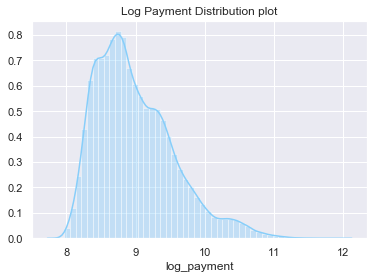

In [110]:
sns.distplot(payment['log_payment'],color='lightskyblue')
plt.title('Log Payment Distribution plot')

The graphs look a lot better and our payment looks like a normal distribution. This is very important for our regression as having a distribution similar to a normal distribtion will provide a better prediction. Next, I am going to look at the multicollinearity of each values to determine if there are any columns too coorelated with each other. 

# Feature Selection

After I finish transforming our dependent variable that looks like a normal distribution, I am going to perform feature selection to determine which feature is needed for this type of problem.

In [19]:
payment.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments', 'log_payment'],
      dtype='object')

I am going to remove 'DRG Defintion, Provider ID, Provider Name, Provider Street Address, Provider City, Provider Zip Code, Hospital Referral Region Description. The reason I am removing these features is because it will not provide any value to my regression. I am also removing Average Total Payments because we have already normalized it.

In [20]:
payment.drop(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City','Provider Zip Code', 'Hospital Referral Region Description',' Average Total Payments '],axis=1,inplace=True)

# Multicollinearity 

To check for Multicollinearity, I need to use VIF, which stands for variance inflation factor. VIF measures how much the variance of an estimated regression coefficient will increased based on the collinearity. 

In [21]:
payment.columns

Index(['Provider State', ' Total Discharges ', ' Average Covered Charges ',
       'Average Medicare Payments', 'log_payment'],
      dtype='object')

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = payment[[' Total Discharges ',' Average Covered Charges ','Average Medicare Payments']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features']= variables.columns

In [23]:
vif

,VIF,Features
0,1.297726,Total Discharges
1,4.966850,Average Covered Charges
2,5.123381,Average Medicare Payments


Looking at our VIF values, our values are within the range of it not being multicollinear. 

# Dummy Variables

I want to change 'Provider State', which is a categorical feature into a numerical feature. The reason I want to do this is because I want to incorporate the states of each payment for better accuracy.

In [24]:
data = pd.get_dummies(payment,drop_first=True)

# Time to Standarize Our Data

It is very important to standardize the data because data that are not standardize will give bias results and will not be accurate

In [25]:
data.columns

Index([' Total Discharges ', ' Average Covered Charges ',
       'Average Medicare Payments', 'log_payment', 'Provider State_AL',
       'Provider State_AR', 'Provider State_AZ', 'Provider State_CA',
       'Provider State_CO', 'Provider State_CT', 'Provider State_DC',
       'Provider State_DE', 'Provider State_FL', 'Provider State_GA',
       'Provider State_HI', 'Provider State_IA', 'Provider State_ID',
       'Provider State_IL', 'Provider State_IN', 'Provider State_KS',
       'Provider State_KY', 'Provider State_LA', 'Provider State_MA',
       'Provider State_MD', 'Provider State_ME', 'Provider State_MI',
       'Provider State_MN', 'Provider State_MO', 'Provider State_MS',
       'Provider State_MT', 'Provider State_NC', 'Provider State_ND',
       'Provider State_NE', 'Provider State_NH', 'Provider State_NJ',
       'Provider State_NM', 'Provider State_NV', 'Provider State_NY',
       'Provider State_OH', 'Provider State_OK', 'Provider State_OR',
       'Provider State_PA', 'P

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
x = data.drop('log_payment',axis=1)
y = data['log_payment']

In [28]:
scale = StandardScaler()

In [29]:
scale_fit = scale.fit_transform(x)

Now  we are going to train and test our model by using train/test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test= train_test_split(scale_fit,y,test_size = .2)

# Import Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
LR = LinearRegression()

In [113]:
#fitting the training data set
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predictions

In [35]:
pred = LR.predict(x_test)

In [36]:
LR.intercept_

8.991372150496069

In [37]:
LR.coef_

array([ 2.26042287e-02,  2.83579657e-02,  4.84310598e-01, -2.91536636e-02,
       -2.00892465e-02, -1.21310947e-02, -2.61768553e-02, -1.27248471e-02,
       -7.82217447e-03, -4.70002414e-03, -4.65492683e-03, -4.39762429e-02,
       -2.38888601e-02,  1.13125267e-03, -1.61052069e-02, -5.83794406e-03,
       -2.41748482e-02, -2.38874006e-02, -1.56021154e-02, -2.36863582e-02,
       -2.00666969e-02, -1.58672588e-02, -7.37247358e-03, -9.42830590e-03,
       -2.20611842e-02, -1.24139450e-02, -2.50618909e-02, -2.14956644e-02,
       -5.25405330e-03, -2.38110012e-02, -5.03242166e-03, -9.27414086e-03,
       -8.81208387e-03, -2.21532702e-02, -6.82393831e-03, -8.97517102e-03,
       -2.33899399e-02, -3.15856617e-02, -2.11413668e-02, -5.19782512e-03,
       -3.18696566e-02, -5.27953779e-03, -1.91593725e-02, -5.54705468e-03,
       -2.79897094e-02, -3.53780634e-02, -3.24579978e-03, -2.29991529e-02,
       -1.26484029e-03, -9.95829029e-03, -1.52222512e-02, -1.80762108e-02,
        3.33653933e-04])

after finidng the coefficients of our prediction, i am going to put it into a dataframe. By doing this, it will be easier to visualize

In [38]:
cdf = pd.DataFrame(LR.coef_,x.columns,columns=['Coeff'])

In [39]:
cdf.head()

,Coeff
Total Discharges,0.022604
Average Covered Charges,0.028358
Average Medicare Payments,0.484311
Provider State_AL,-0.029154
Provider State_AR,-0.020089


I am going to create a scatter plot between my test data and my prediciton data. This will help me illustrate the correlation and accuracy of my data.

Text(0, 0.5, 'Linear Regression Prediction')

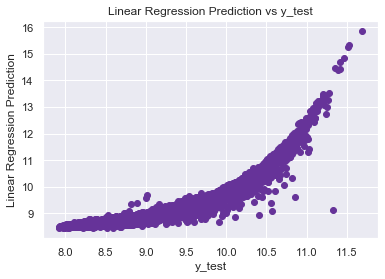

In [112]:
plt.scatter(y_test,pred,color = 'rebeccapurple')
plt.title('Linear Regression Prediction vs y_test')
plt.xlabel('y_test')
plt.ylabel('Linear Regression Prediction')

The prediciton looks really good as the data seem to be clustered tightly. However, it looks like there is an exponential curve. I am going to plot the residual to see our model performance

Text(0.5, 1.0, 'Linear Regression Residual Plot ')

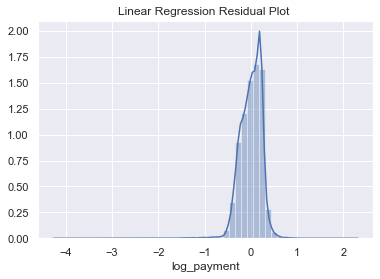

In [118]:
sns.distplot(y_test - pred)
plt.title('Linear Regression Residual Plot ')

Our residual plot looks like a normal distribtion plot, but it looks skewed  on the left. I am going to see the accuracy of our training set

In [42]:
LR.score(x_train,y_train)

0.8221011253040104

The training data has ana ccuracy of 82.2%, which is fairly good. However, I want to view our squared errors metric 

# Import Regression Evaluation Metrics

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [44]:
print('MAE:', mean_absolute_error(y_test,pred))
print('MSE:', mean_squared_error(y_test,pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred)))

MAE: 0.18177546141814788
MSE: 0.056649621585193786
RMSE: 0.23801180975992303


From looking at the metrics, an RMSE score of .16 in this given problem is very good as it shown on the graph that there are little errors. However, I believe the model can be improved. I am going to try a different model to see if I can improve it.

# Random Forest Regression

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
RF = RandomForestRegressor(n_estimators=50)

In [55]:
RF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [56]:
rf_pred = RF.predict(x_test)

In [126]:
RF.score(x_train,y_train)

0.9969141318571229

Text(0, 0.5, 'Random_Forest Pred')

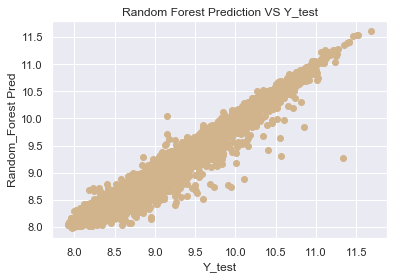

In [117]:
plt.scatter(y_test,rf_pred,color = 'tan')
plt.title('Random Forest Prediction VS Y_test')
plt.xlabel('Y_test')
plt.ylabel('Random_Forest Pred')

by looking at the graph, it is a linear graph. This tells me that the prediction is very accurate.

# Residual plot

Text(0.5, 1.0, 'Random Forest Residual Plot')

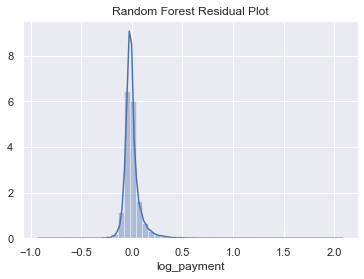

In [119]:
sns.distplot(y_test - rf_pred)
plt.title('Random Forest Residual Plot')

In [123]:
print('MAE:', mean_absolute_error(y_test,rf_pred))
print('MSE:', mean_squared_error(y_test,rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,rf_pred)))

MAE: 0.05222532401378685
MSE: 0.007087795794146183
RMSE: 0.08418904794654815


# Conclusion

Overall, Both model came out very well but Random Forest has a better prediction score. Linear Regression has an accuracy score of 82.2% in its training set, but Random Forest produces a score of 99.7%. This is important for a business that wants to predict prices because having a 99.7% accuracy on a model with minimum errors will benefit the company.